In [1]:
options(warn=-1)
library(TraMineR)
library(cluster)
library(repr)


TraMineR stable version 2.2-3 (Built: 2022-03-25)

Website: http://traminer.unige.ch

Please type 'citation("TraMineR")' for citation information.




# Load Motif Data

In [2]:
act_seq=read.csv('motif.csv', sep=',')
seq_len=length(names(act_seq))-1
print(paste('Length of sequence:', seq_len))
print(names(act_seq))

[1] "Length of sequence: 24"
 [1] "PID"     "hour_0"  "hour_1"  "hour_2"  "hour_3"  "hour_4"  "hour_5" 
 [8] "hour_6"  "hour_7"  "hour_8"  "hour_9"  "hour_10" "hour_11" "hour_12"
[15] "hour_13" "hour_14" "hour_15" "hour_16" "hour_17" "hour_18" "hour_19"
[22] "hour_20" "hour_21" "hour_22" "hour_23"


# Generate Seq Obj

In [3]:
alph=seqstatl(act_seq[, seq(2,seq_len)])
print(paste('Alphabet:', toString(alph)))
act_seq.alphabet <- alph
act_seq.labels <- c('School', 'Health', 'Home', 'Pick-up-Drop-off', 'Recreation', 
                    'Shop', 'Visit', 'Work')
act_seq.scodes <- alph
act_seq.seq <- seqdef(act_seq, 2:seq_len, alphabet = act_seq.alphabet, states = act_seq.scodes, 
                      labels = act_seq.labels, xtstep = 6)

[1] "Alphabet: C, E, H, P, R, S, V, W"


 [>] state coding:

       [alphabet]  [label]  [long label] 

     1  C           C        School

     2  E           E        Health

     3  H           H        Home

     4  P           P        Pick-up-Drop-off

     5  R           R        Recreation

     6  S           S        Shop

     7  V           V        Visit

     8  W           W        Work

 [>] 372 sequences in the data set

 [>] min/max sequence length: 23/23



# Visualization

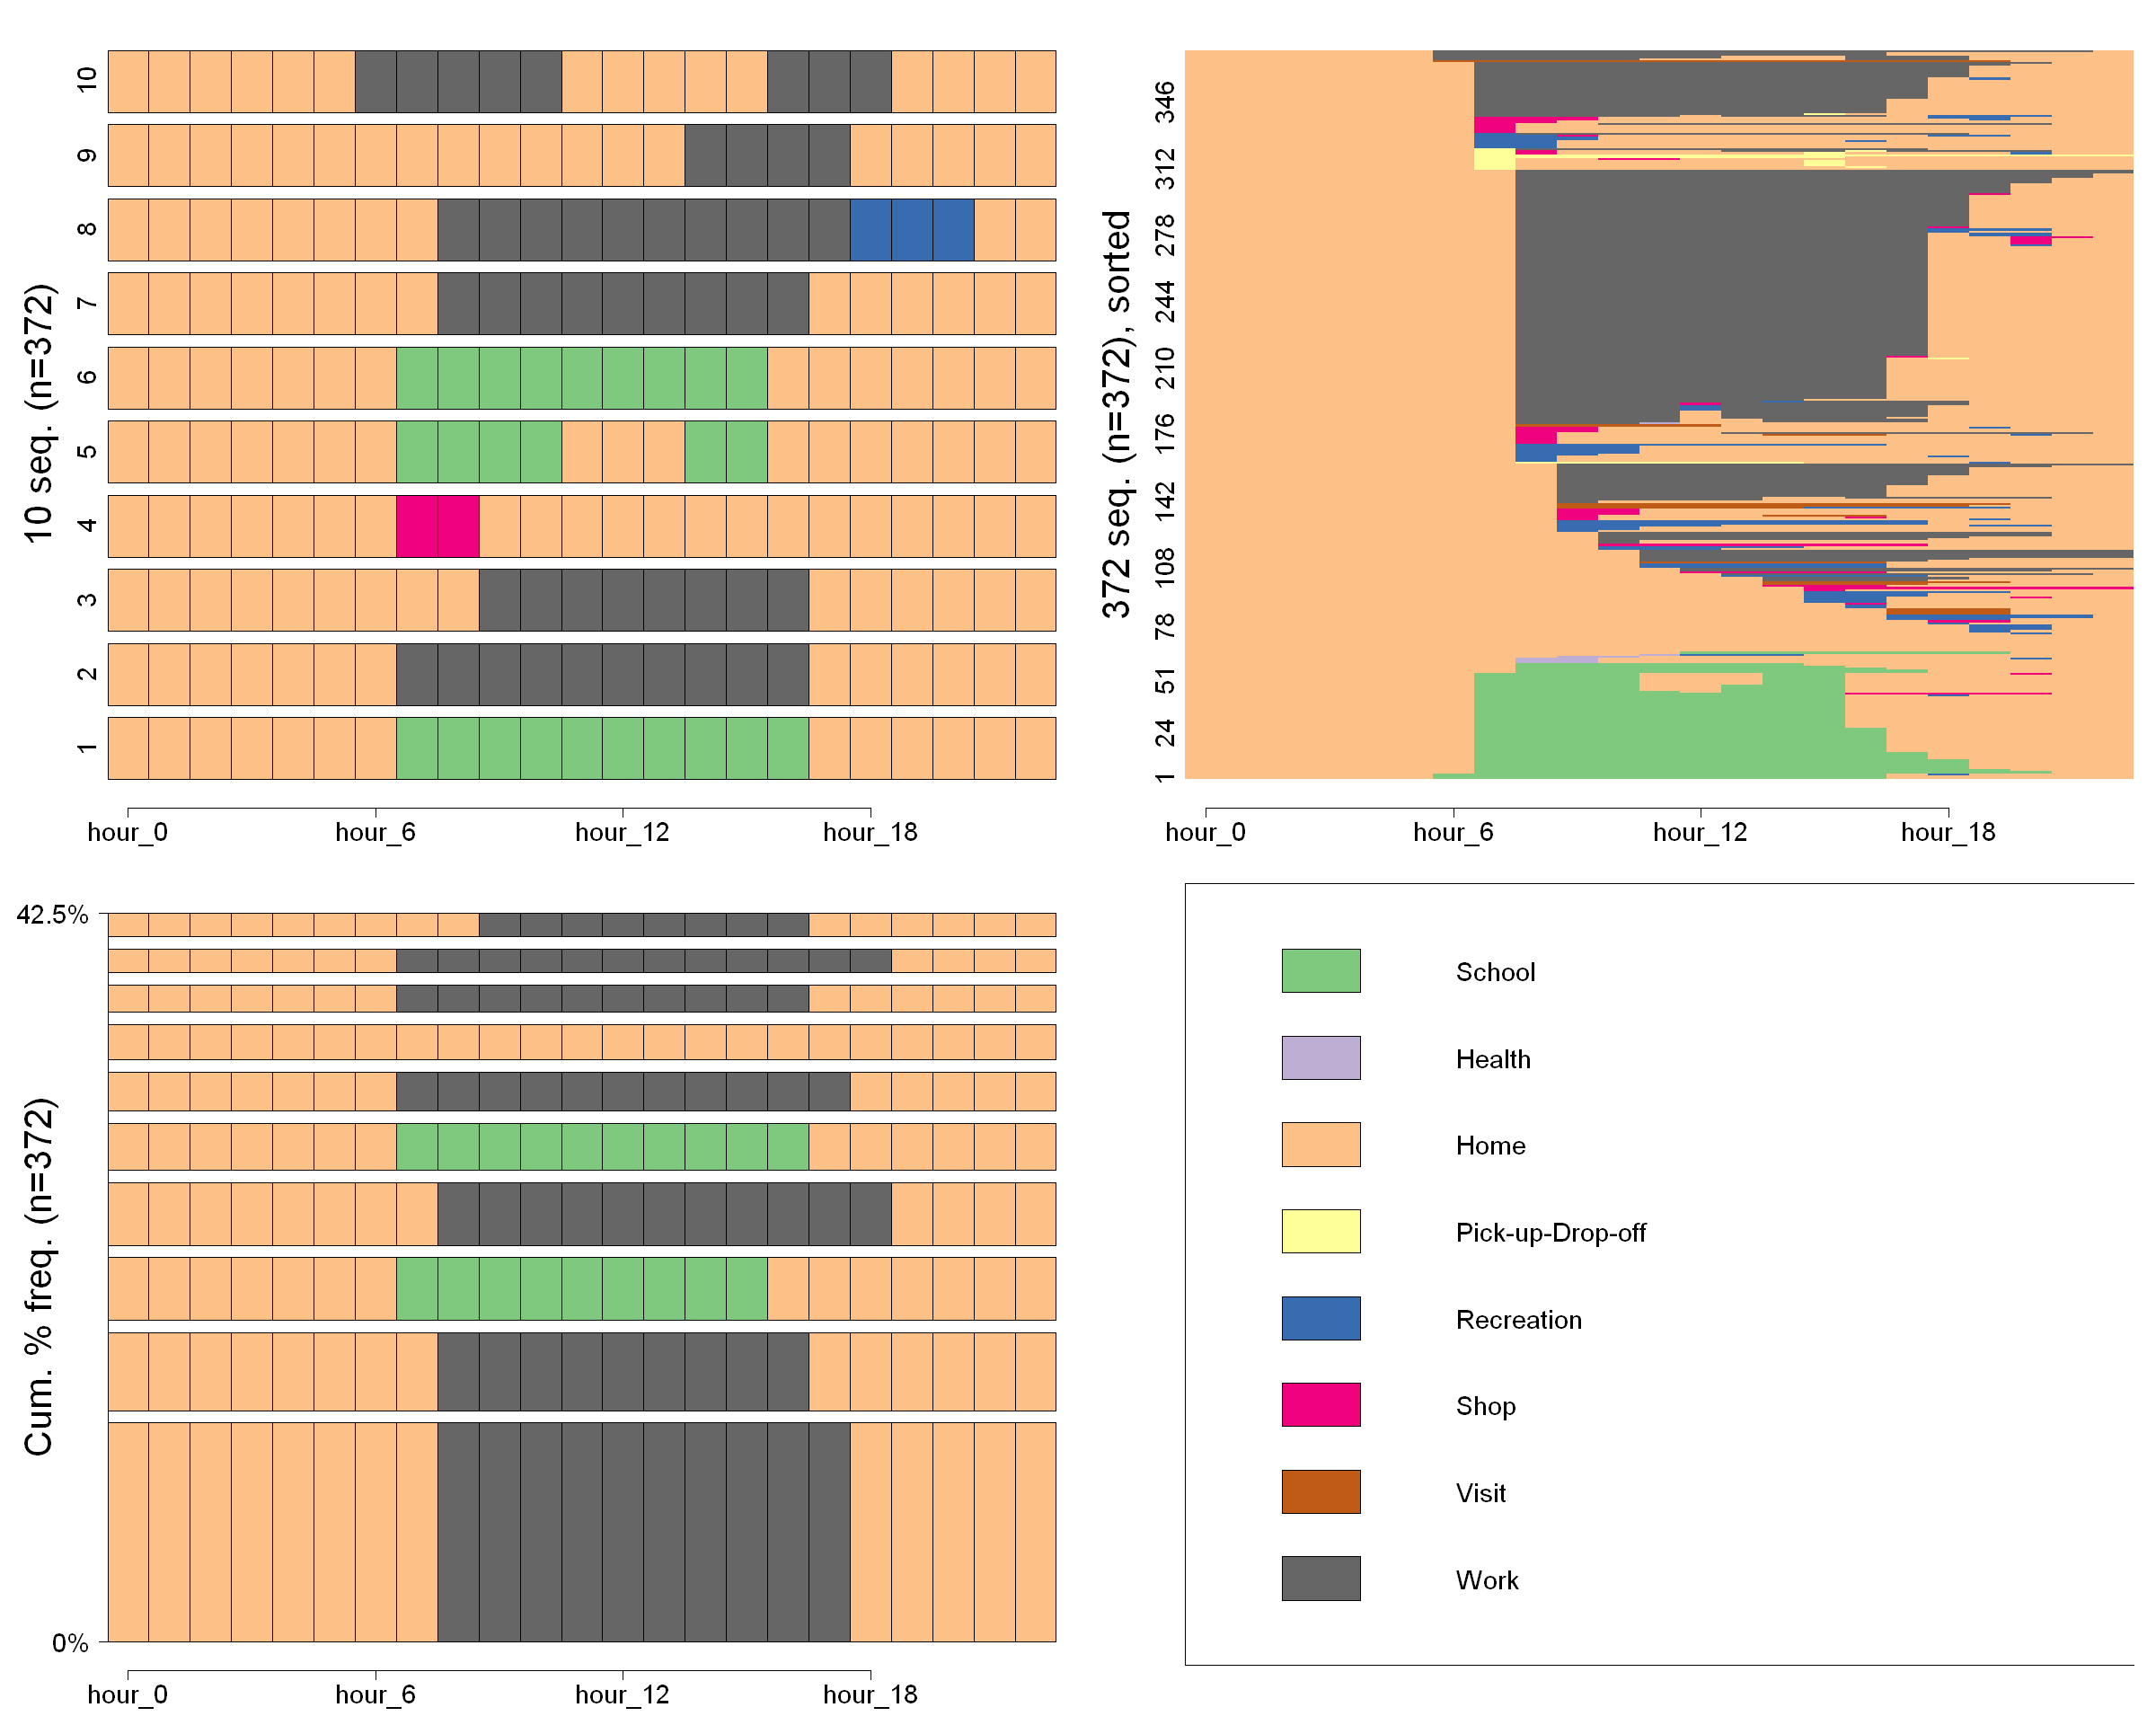

In [4]:
options(repr.plot.width=20, repr.plot.height=16)
par(mfrow=c(2, 2), mai=c(0.5,1.0,0.2,0.2))
seqiplot(act_seq.seq, with.legend = FALSE, 
         cex.axis=1.75, cex.lab=2.5)
seqIplot(act_seq.seq, sortv = "from.start", with.legend = FALSE, 
         cex.axis=1.75, cex.lab=2.5)
seqfplot(act_seq.seq, with.legend = FALSE, 
         cex.axis=1.75, cex.lab=2.5)
seqlegend(act_seq.seq, cex=1.75, boxes=TRUE)

# Clustering

In [5]:
dist.om1 <- seqdist(act_seq.seq, method = "OM", indel = 1, sm = "TRATE")

 [>] 372 sequences with 8 distinct states

 [>] Computing sm with seqcost using  TRATE

 [>] creating substitution-cost matrix using transition rates ...

 [>] computing transition probabilities for states C/E/H/P/R/S/V/W ...

 [>] 150 distinct  sequences 

 [>] min/max sequence lengths: 23/23

 [>] computing distances using the OM metric

 [>] elapsed time: 0.19 secs



In [6]:
clusterward1 <- agnes(dist.om1, diss = TRUE, method = "ward")
n_clusters=5
cl1 <- cutree(clusterward1, k = n_clusters)
cl1.fac <- factor(cl1, labels = paste("Cluster", 1:n_clusters))

## All Sequences in Each Cluster

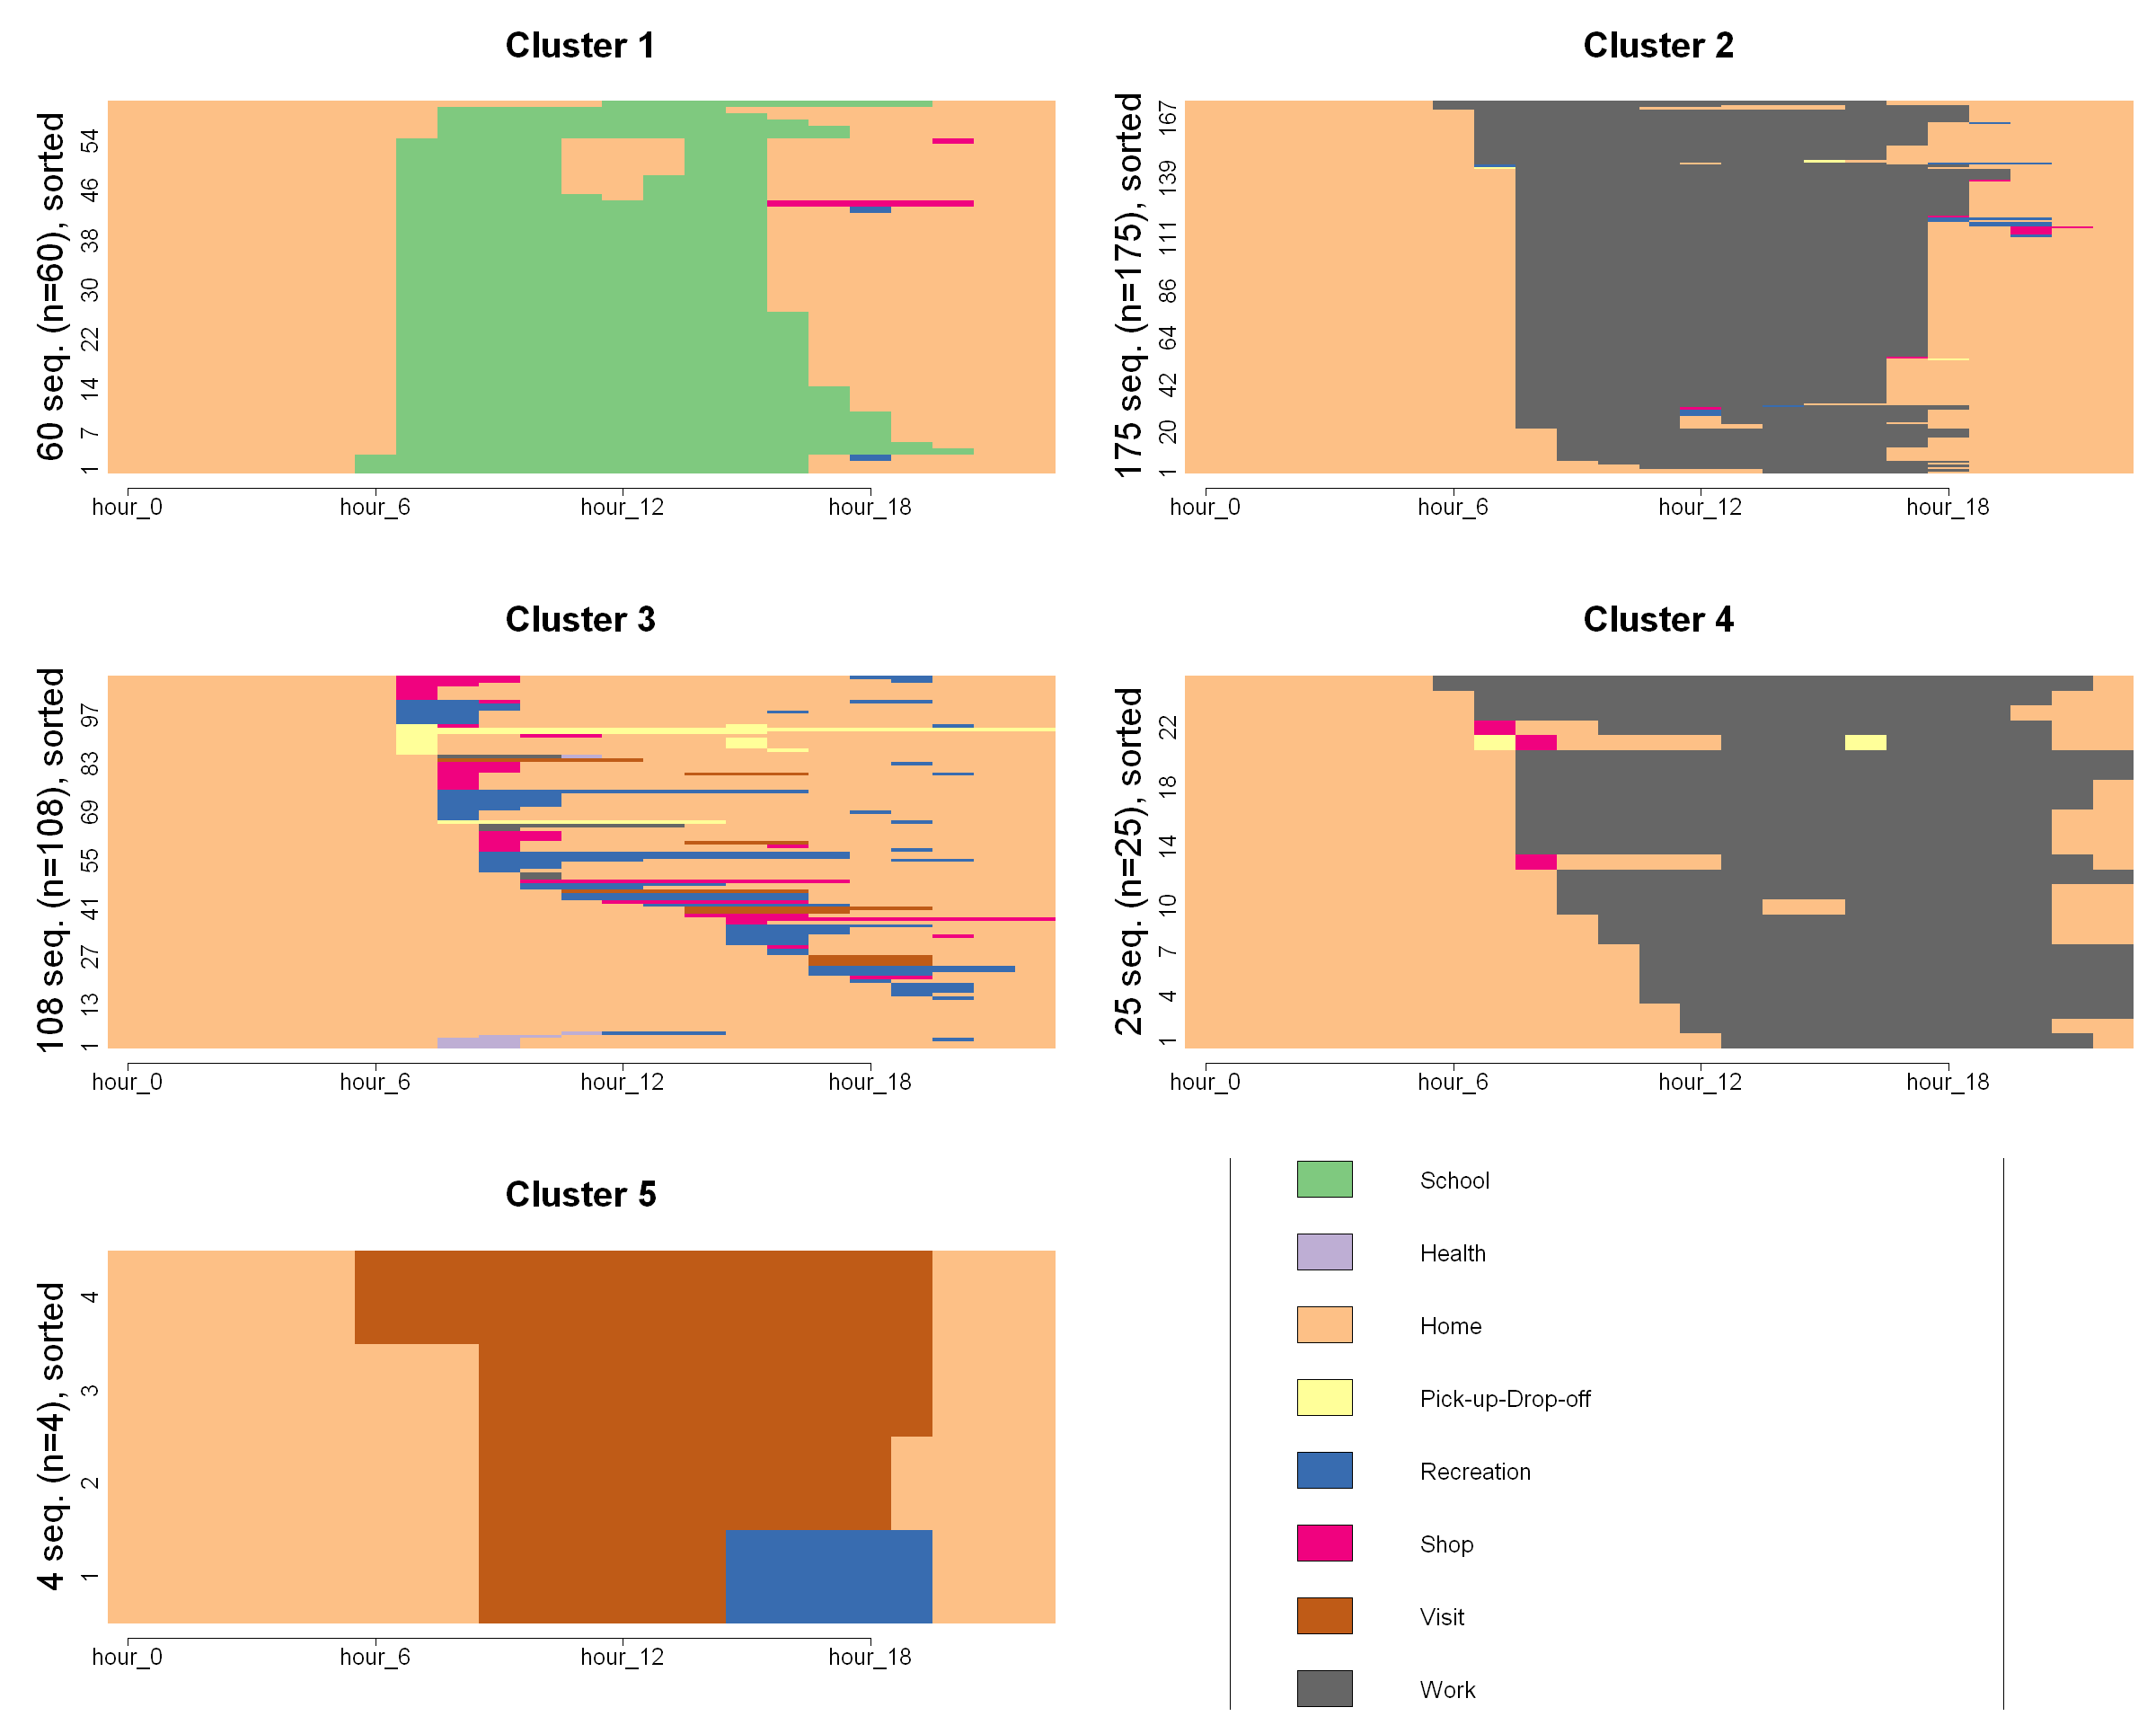

In [7]:
par(mai=c(0.8,1.0,0.8,0.2))
seqIplot(act_seq.seq, group = cl1.fac, sortv = "from.start", 
         cex.axis=2, cex.lab=3, cex.legend=2, cex.main=3)

## State Distribution in Each Cluster

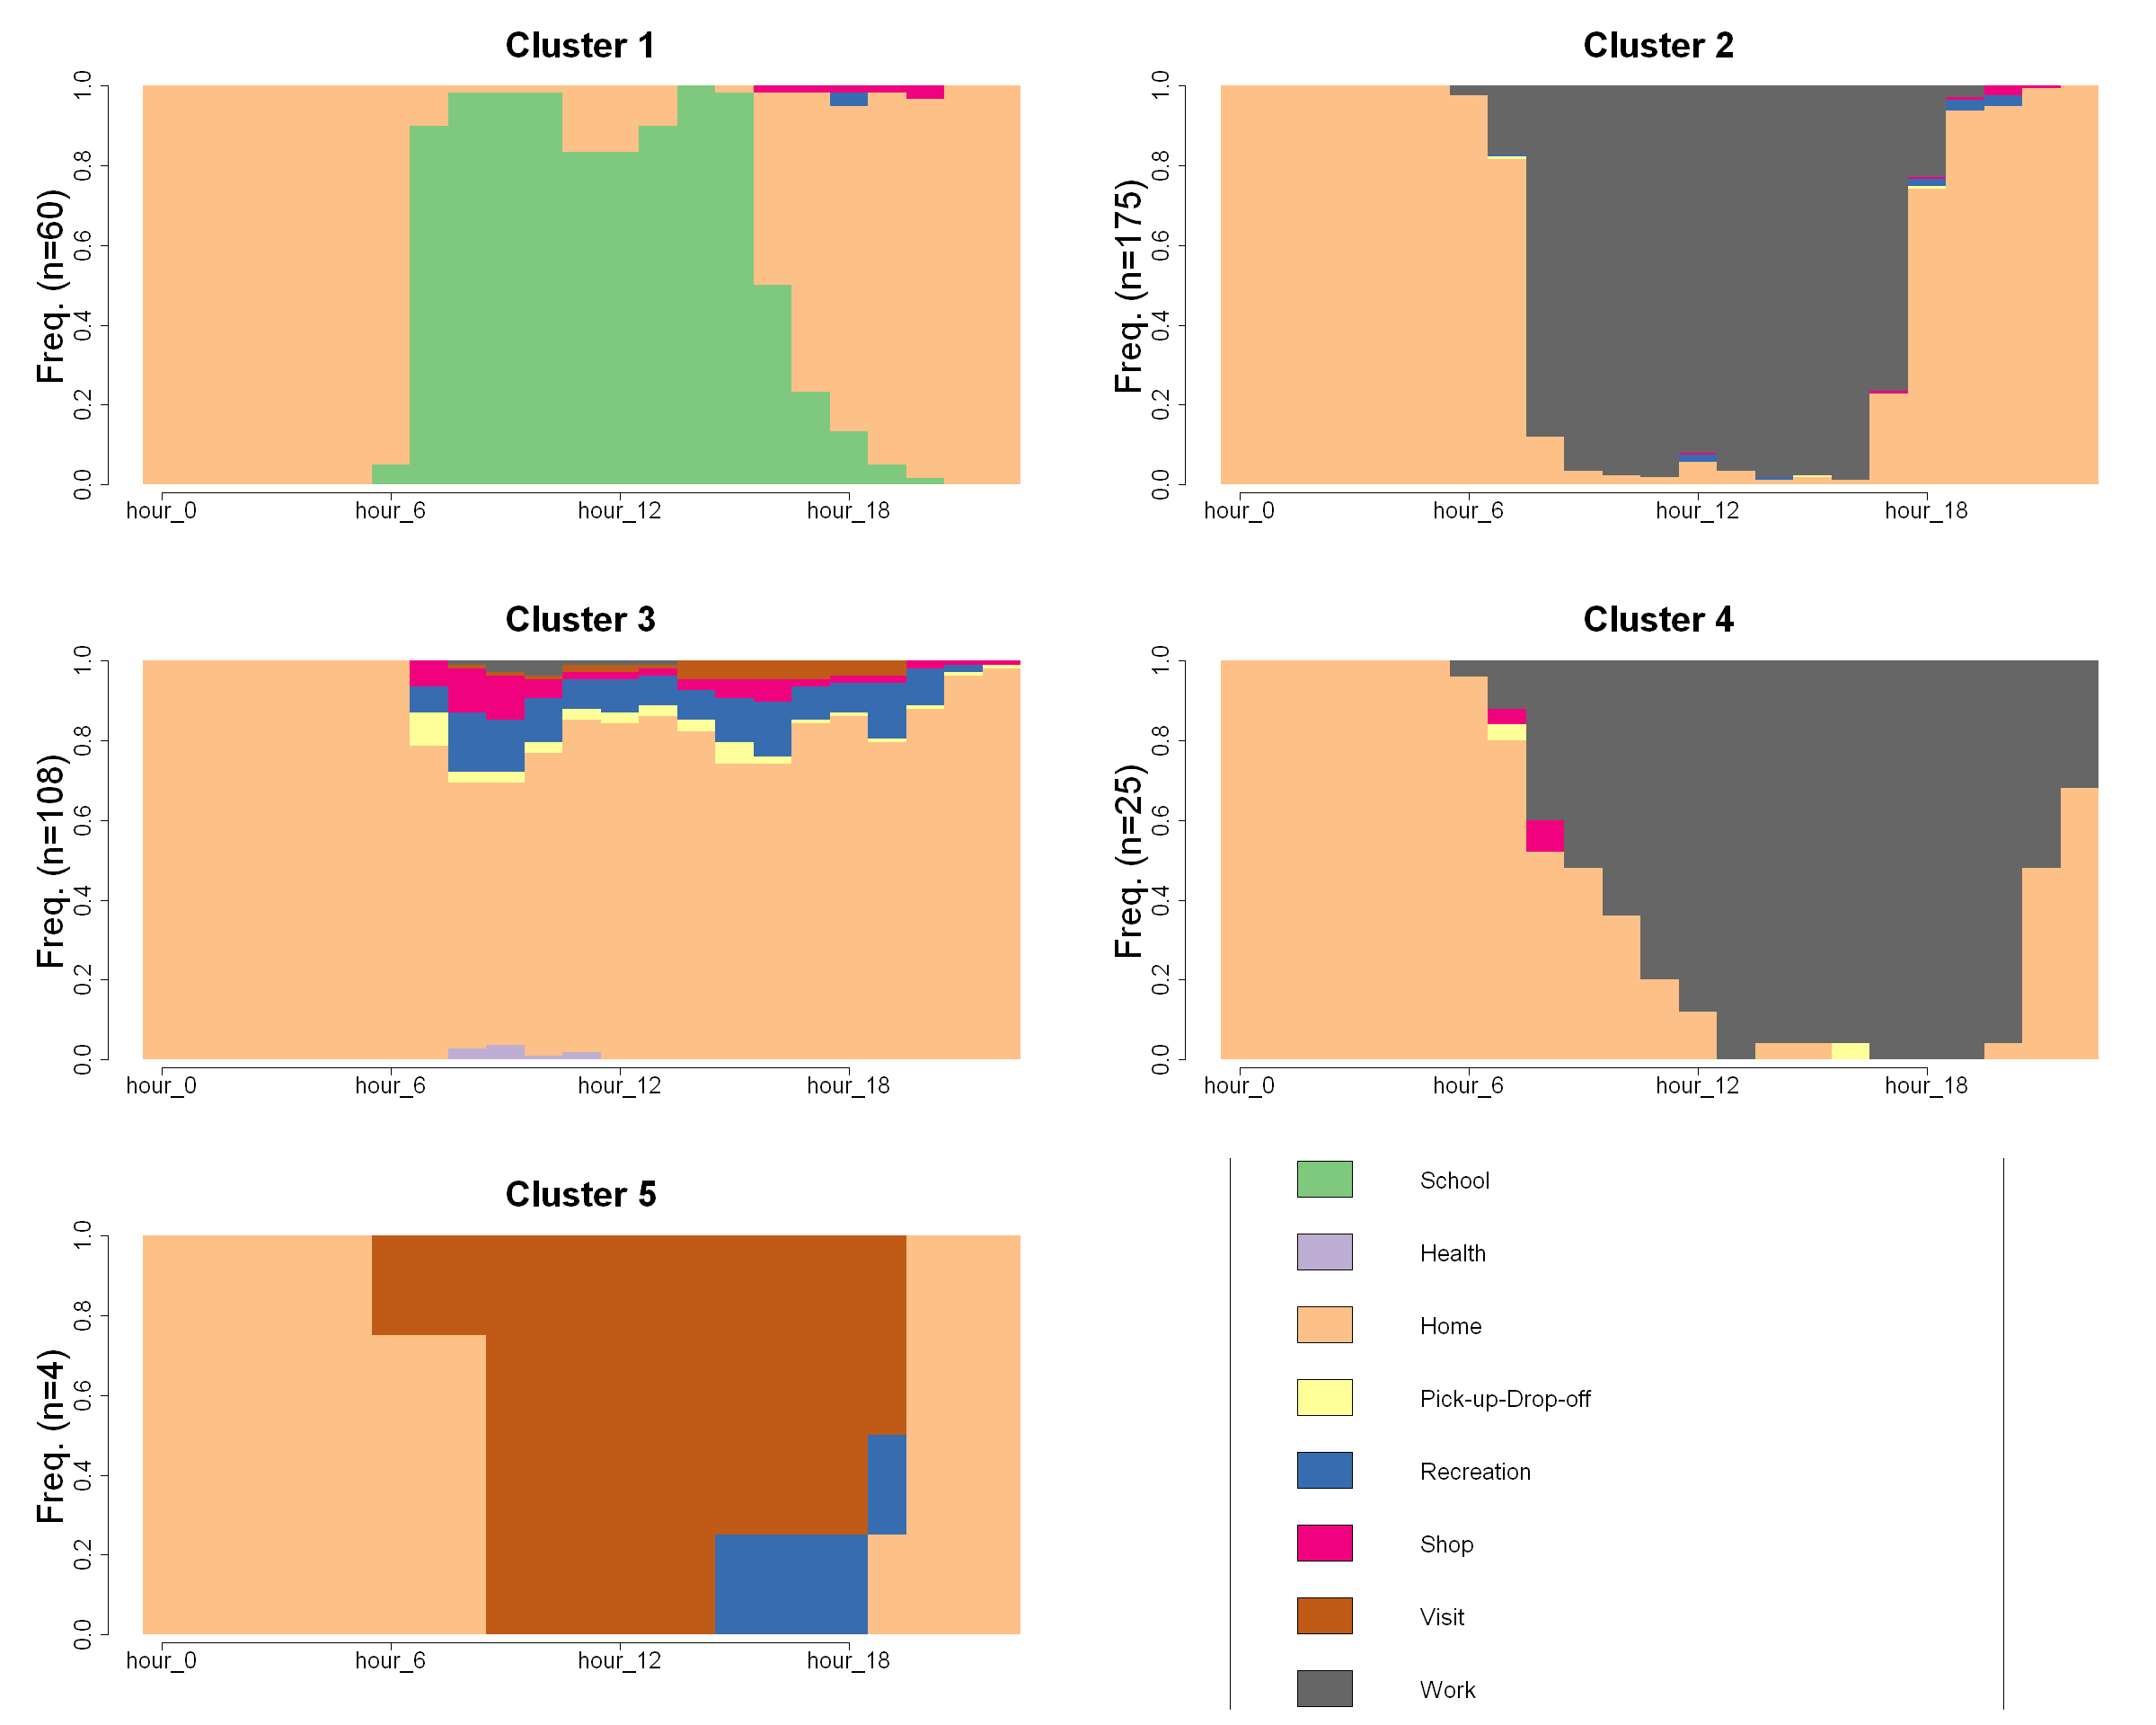

In [8]:
par(mai=c(0.8,1.0,0.8,0.2))
seqdplot(act_seq.seq, group = cl1.fac, border = NA,
        cex.axis=2, cex.lab=3, cex.legend=2, cex.main=3)

## Sequence Freq in Each Cluster

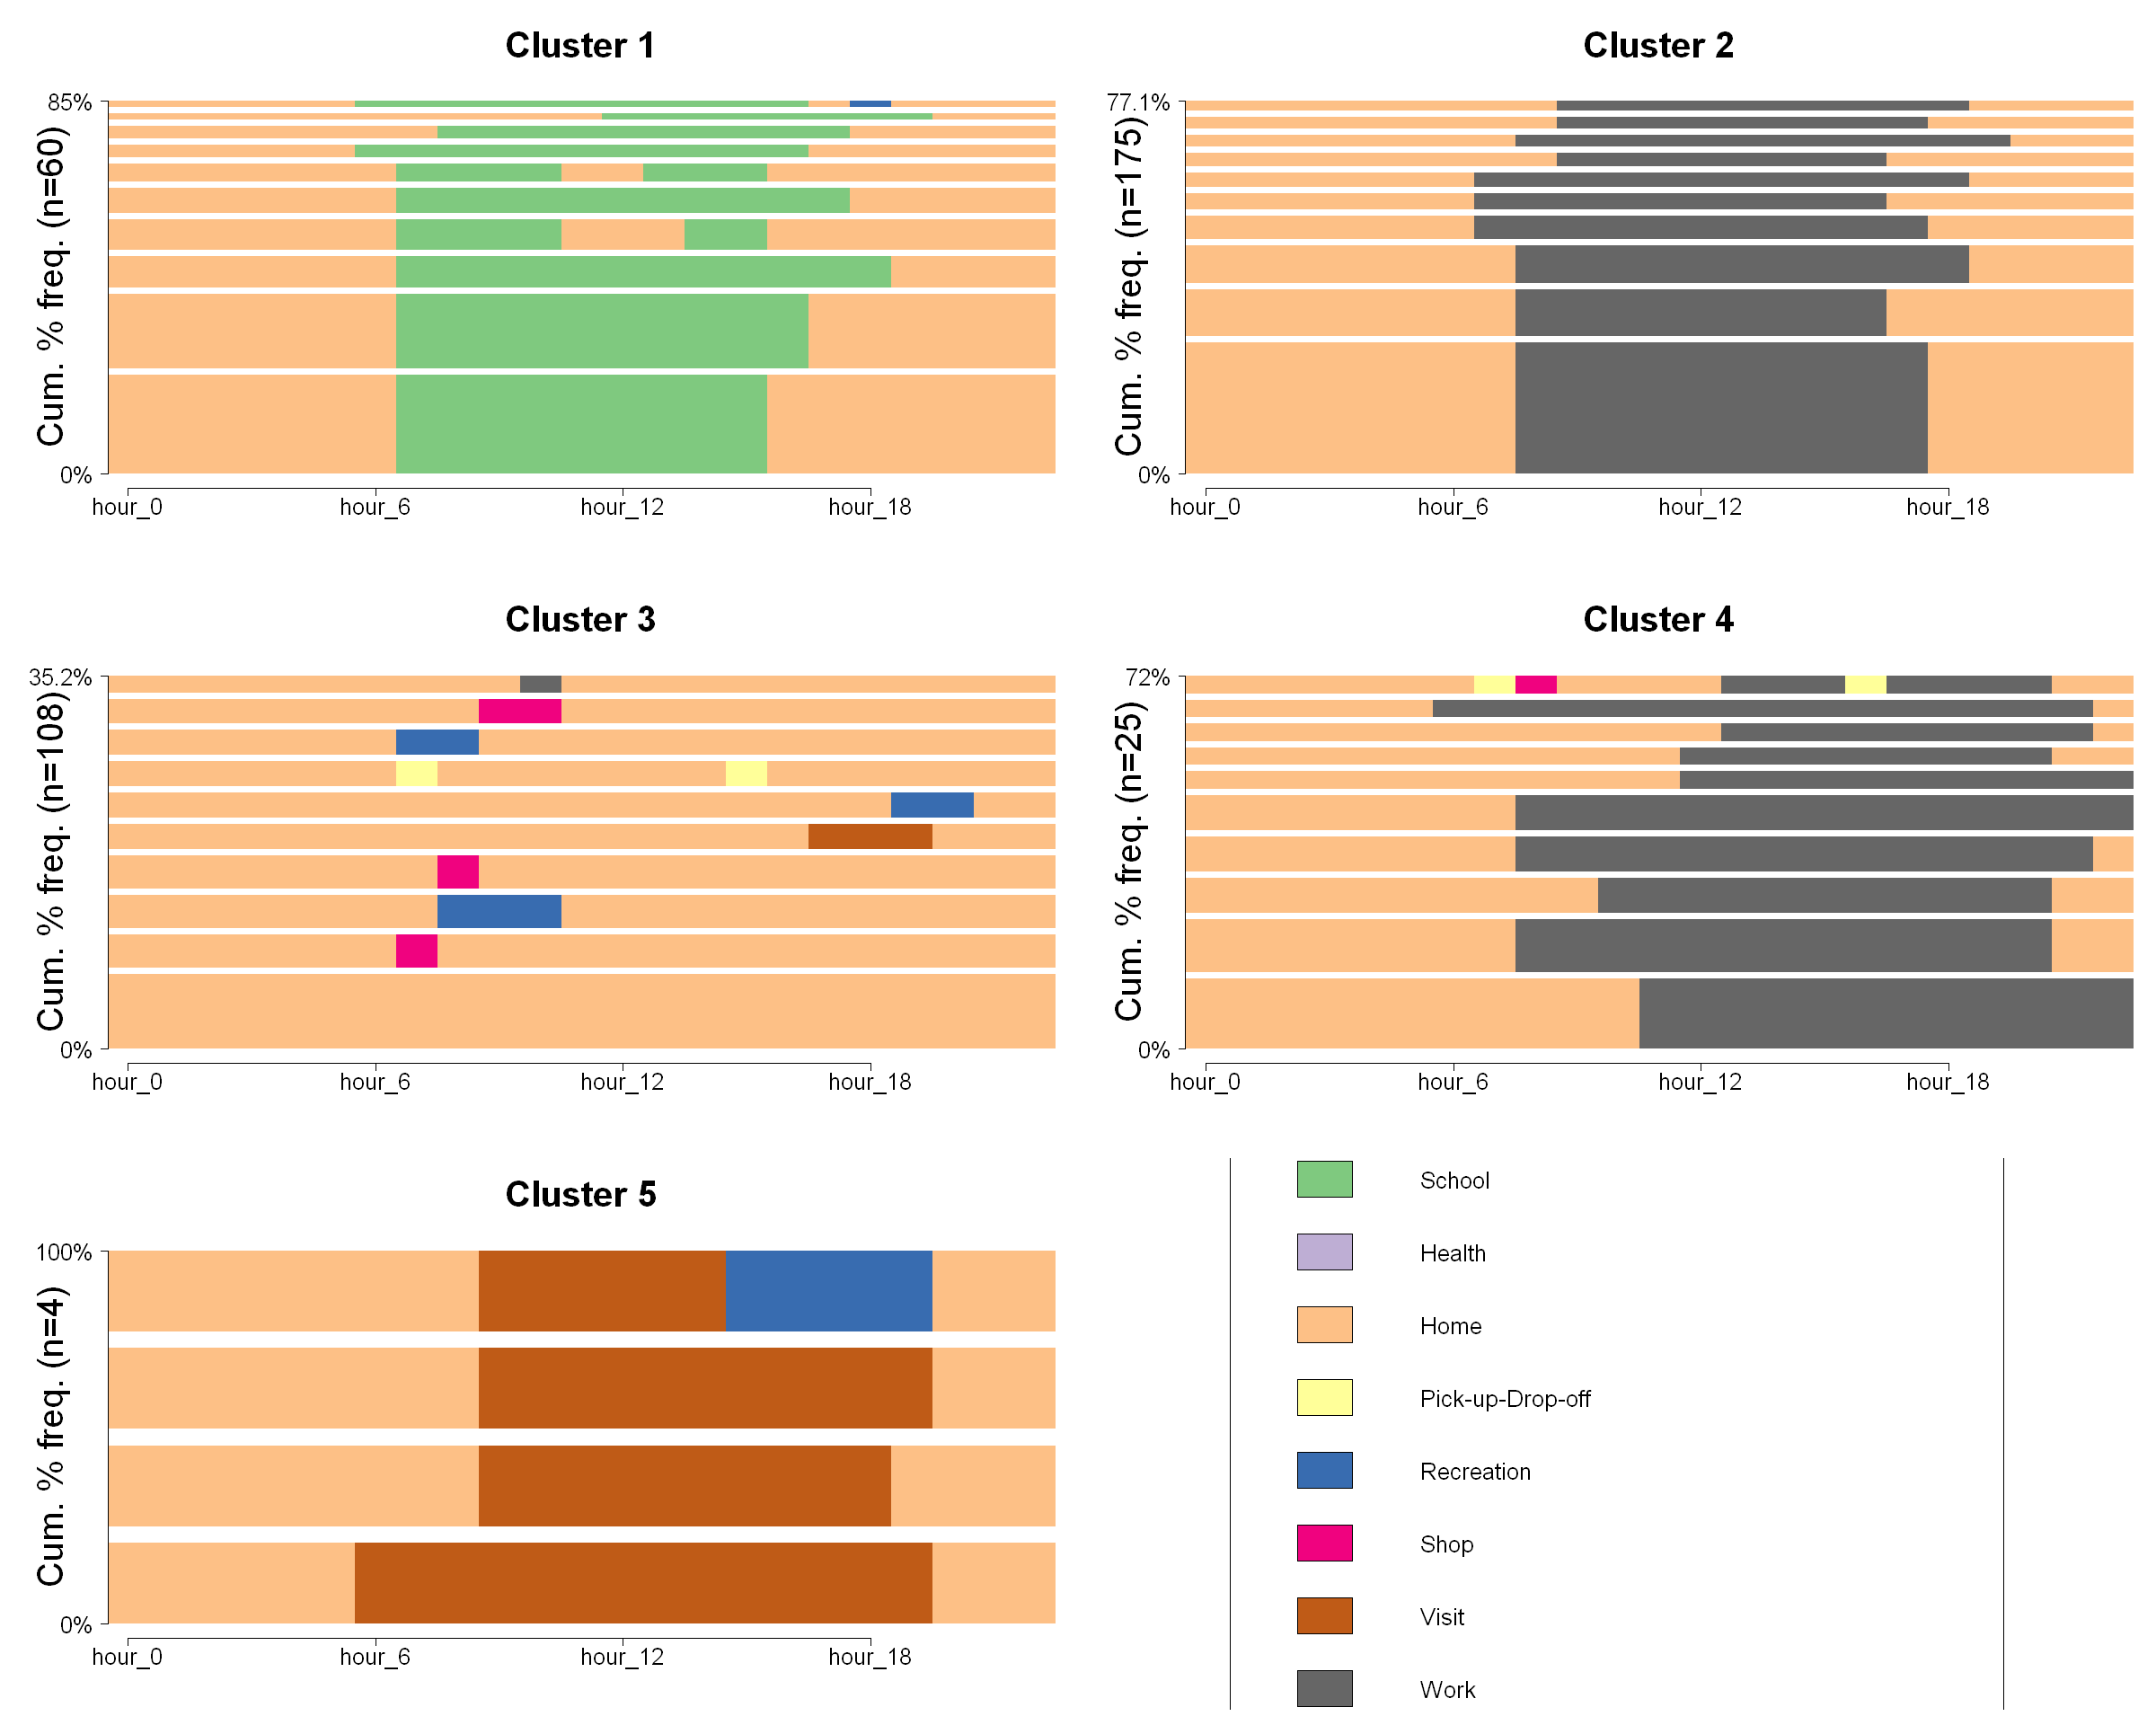

In [9]:
par(mai=c(0.8,1.0,0.8,0.2))
seqfplot(act_seq.seq, diss = dist.om1, group = cl1.fac,
         border = NA, cex.axis=2, cex.lab=3, cex.legend=2, cex.main=3)

## Representative Sequence in Each Cluster

 [>] number of objects (sum of weights): 60

 [>] max. distance: 32

 [>] neighborhood radius: 3.2

 [>] 1 representative(s) selected, coverage=63% (threshold=25%)

 [>] 19 distinct sequence(s)

 [>] number of objects (sum of weights): 175

 [>] max. distance: 32

 [>] neighborhood radius: 3.2

 [>] 1 representative(s) selected, coverage=78% (threshold=25%)

 [>] 41 distinct sequence(s)

 [>] number of objects (sum of weights): 108

 [>] max. distance: 32

 [>] neighborhood radius: 3.2

 [>] 1 representative(s) selected, coverage=40% (threshold=25%)

 [>] 69 distinct sequence(s)

 [>] number of objects (sum of weights): 25

 [>] max. distance: 32

 [>] neighborhood radius: 3.2

 [>] 1 representative(s) selected, coverage=36% (threshold=25%)

 [>] 17 distinct sequence(s)

 [>] number of objects (sum of weights): 4

 [>] max. distance: 32

 [>] neighborhood radius: 3.2

 [>] 1 representative(s) selected, coverage=50% (threshold=25%)

 [>] 4 distinct sequence(s)



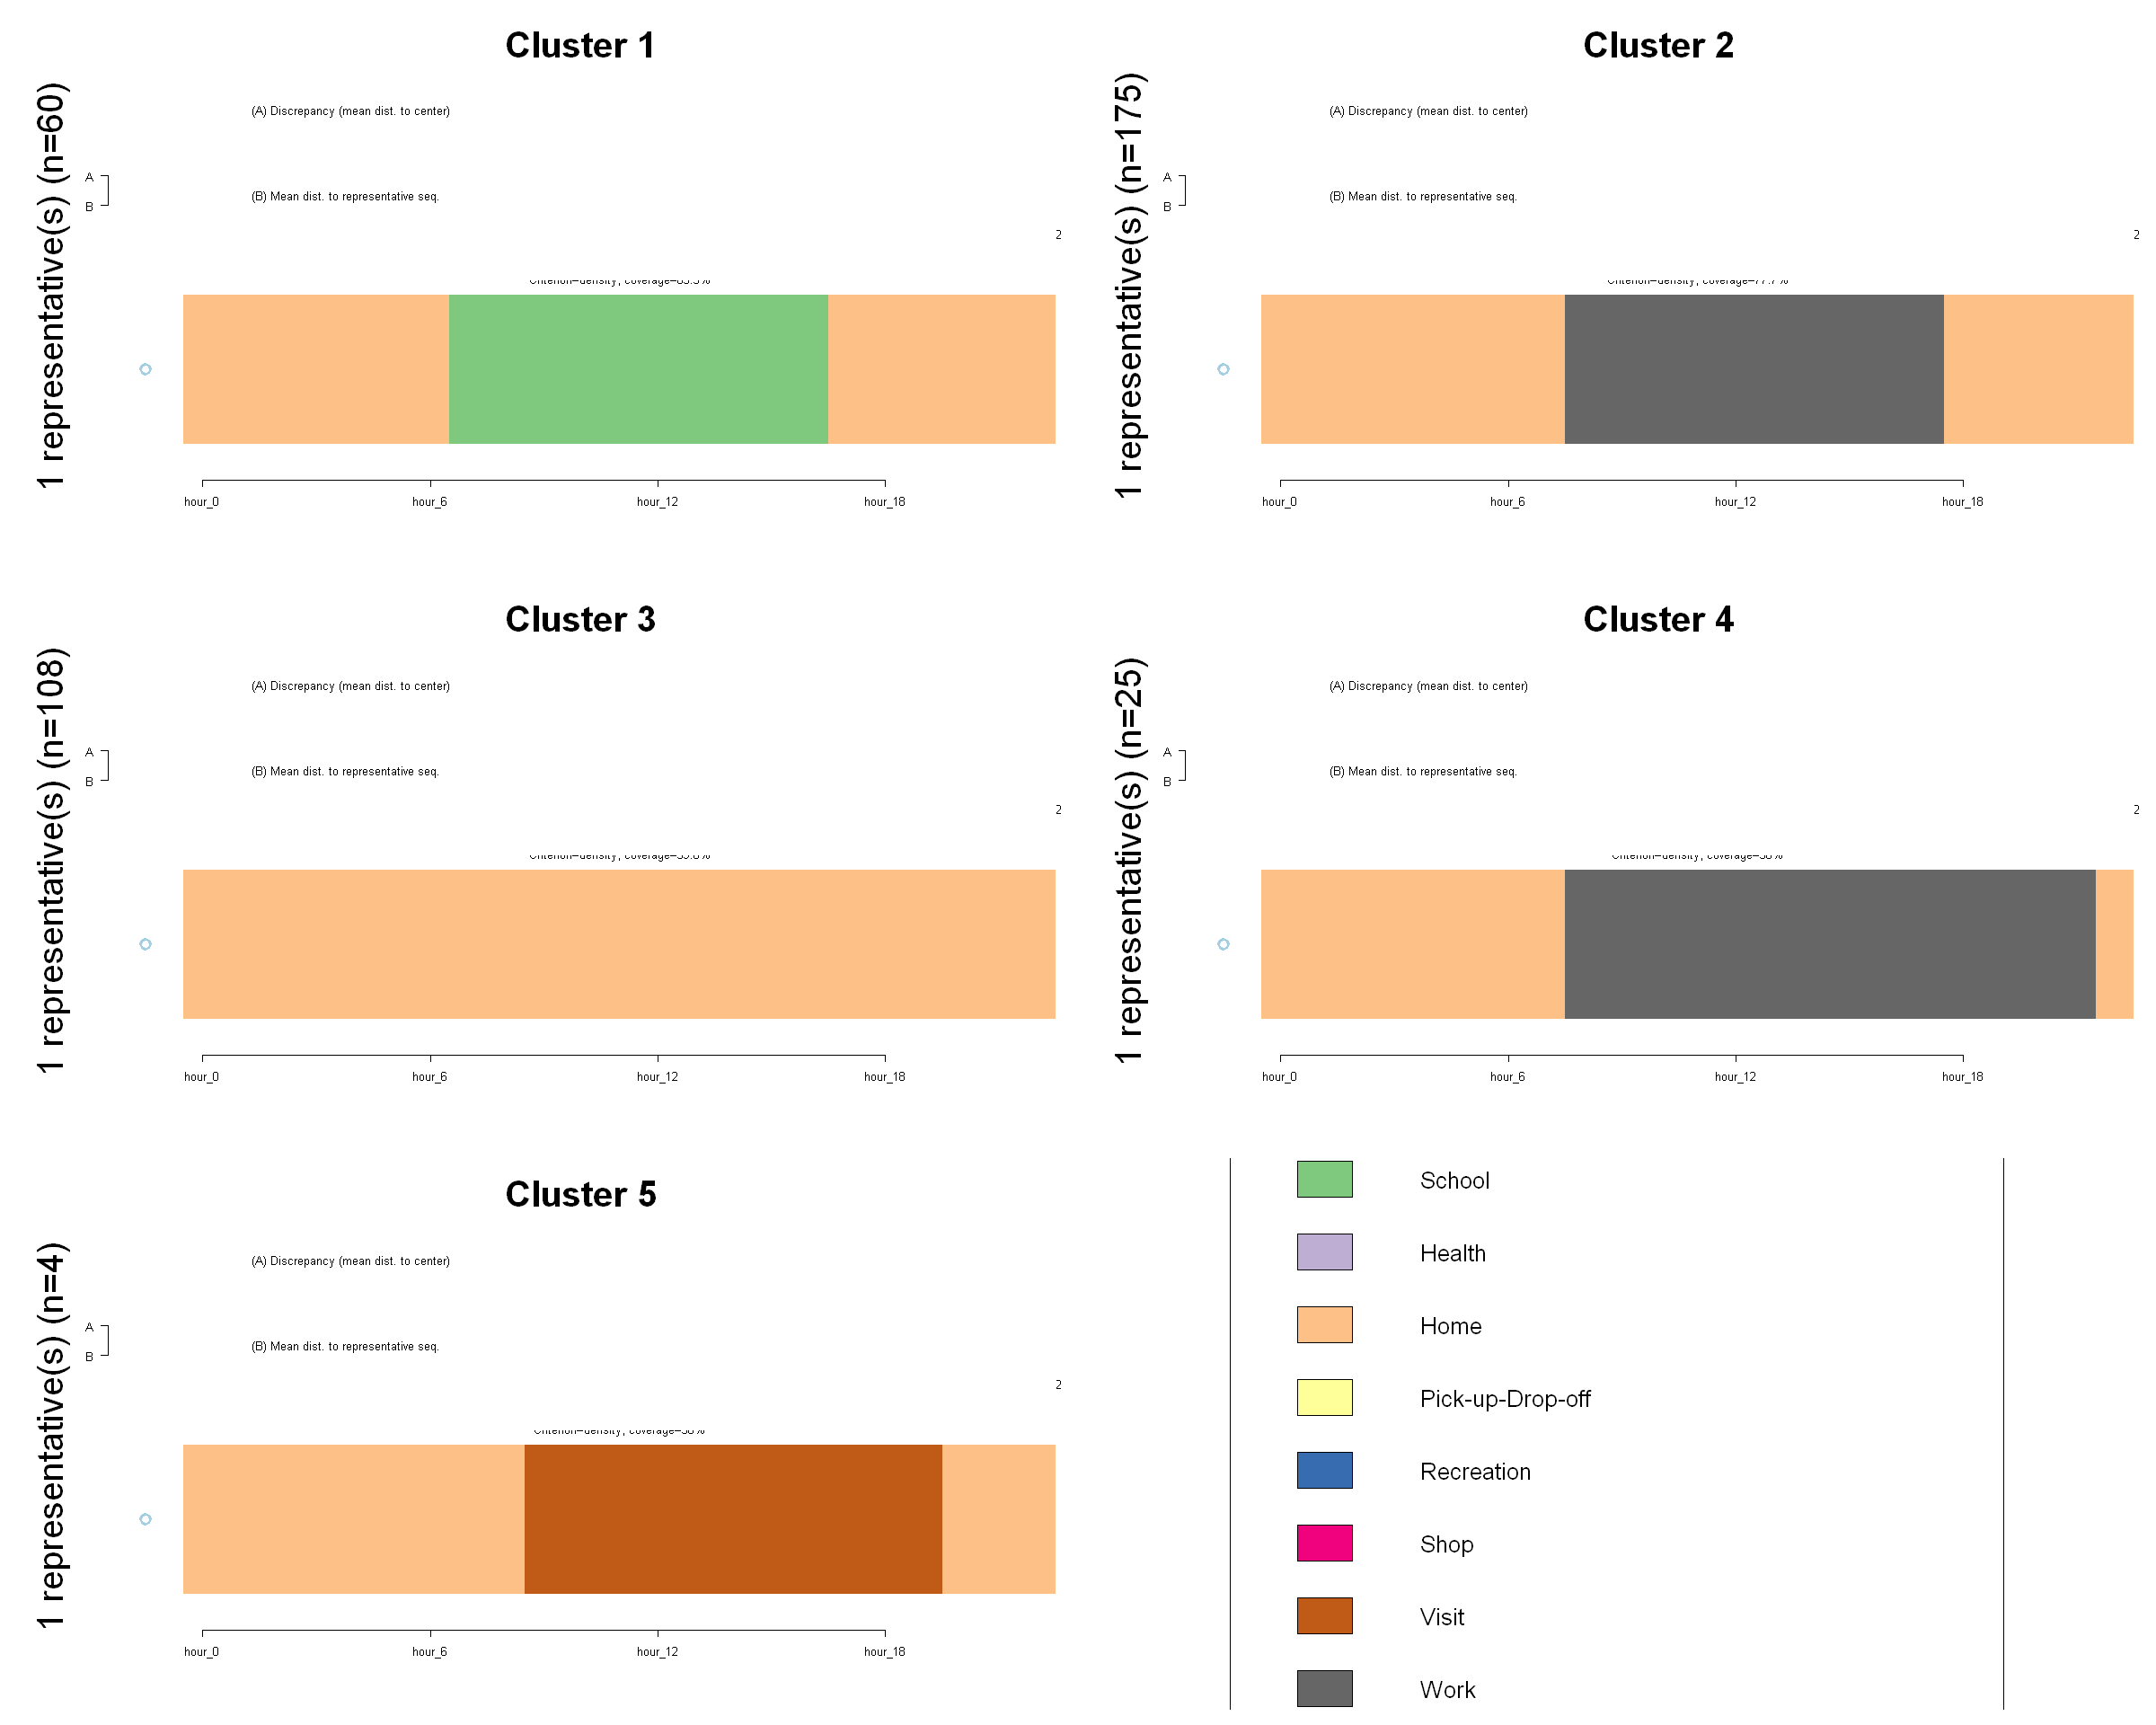

In [10]:
par(mai=c(0.8,1.0,0.8,0.2))
seqrplot(act_seq.seq, diss = dist.om1, group = cl1.fac,
         border = NA, cex.axis=2, cex.lab=3, cex.legend=2, cex.main=3)

## Transversal Entropy in Each Cluster

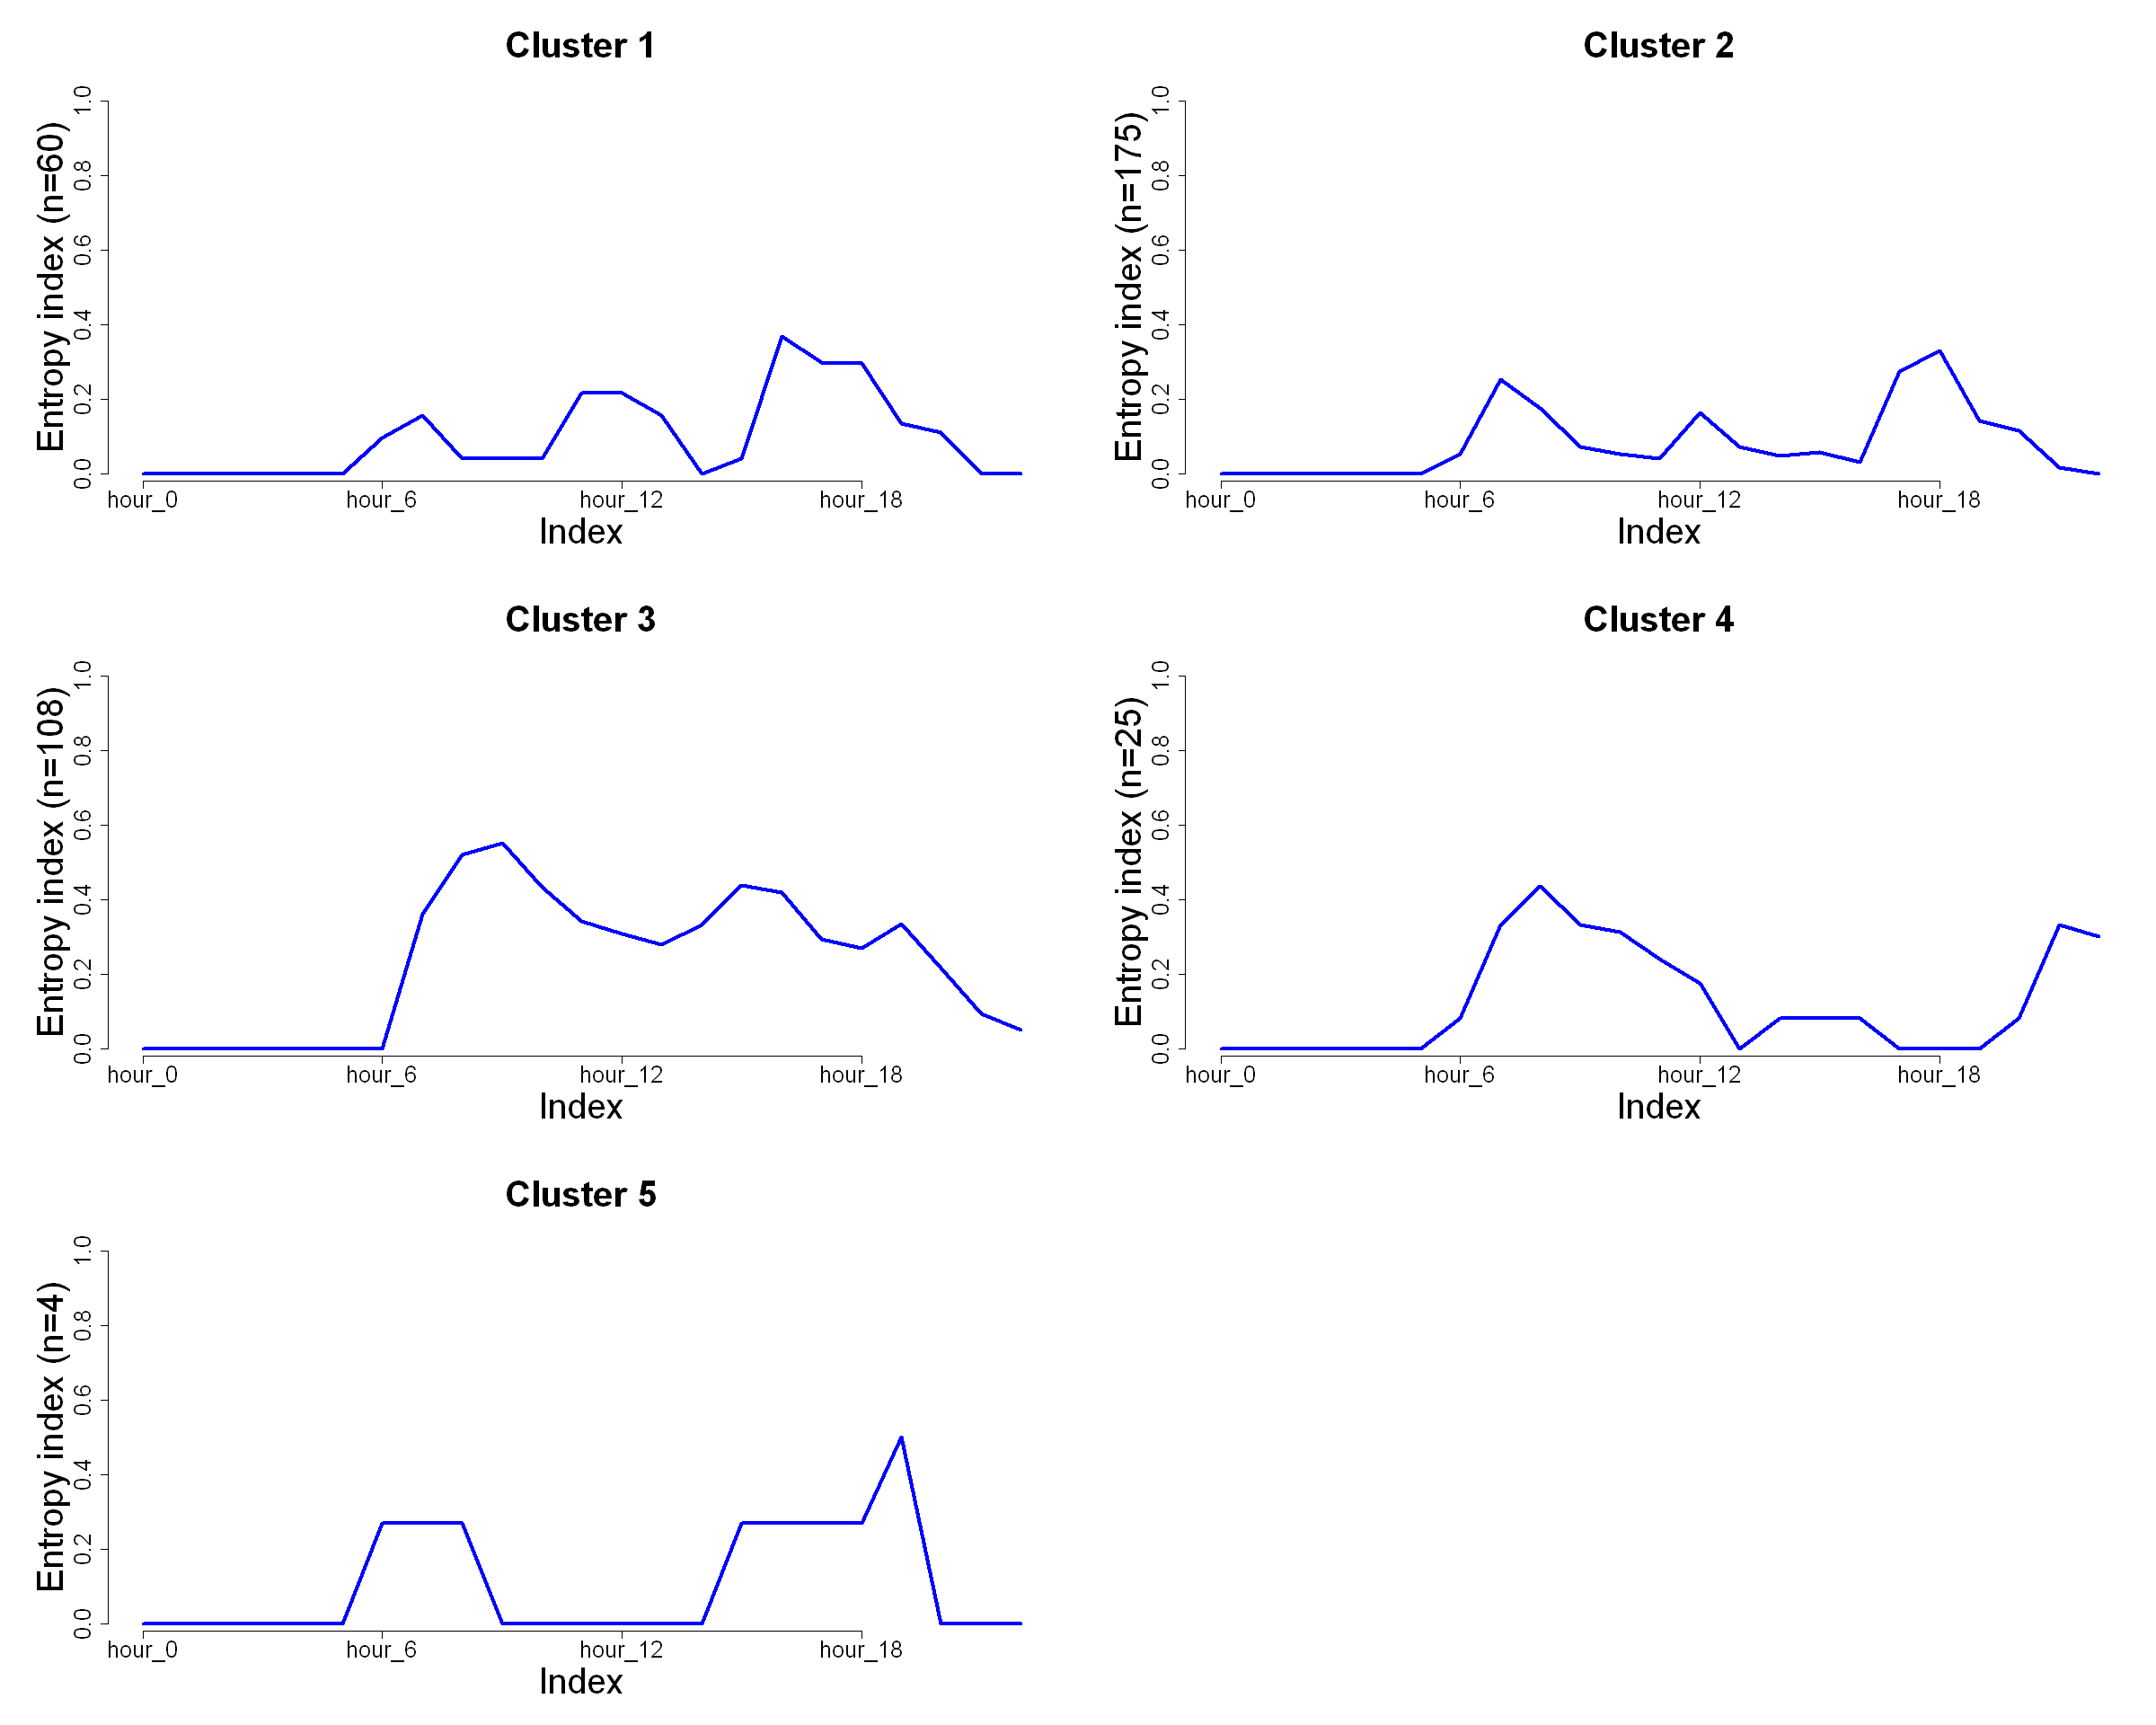

In [11]:
par(mai=c(0.8,1.0,0.8,0.2))
seqHtplot(act_seq.seq, diss = dist.om1, group = cl1.fac,
         border = NA, cex.axis=2, cex.lab=3, cex.legend=2, cex.main=3)